<a href="https://colab.research.google.com/github/RomainCendre/DSTest/blob/main/deepsense_generative_takehome_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Data modeling

Given the following [data-set](https://gist.githubusercontent.com/alephd/e3899eaae0e7869e9c230f6a0fe944e5/raw/deab4f93a9c15224ac118d46533d9ea9700d206a/2019_data_science_test.json).



In [1]:
import requests
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np

# Read the Gist
res = requests.get("https://gist.githubusercontent.com/alephd/e3899eaae0e7869e9c230f6a0fe944e5/raw/deab4f93a9c15224ac118d46533d9ea9700d206a/2019_data_science_test.json")
data_1 = np.array(res.json())
print(data_1.shape)

(1542, 7)


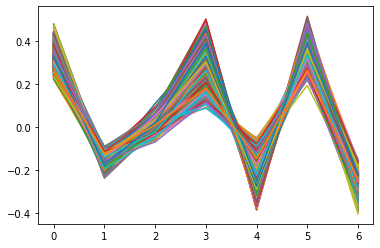

In [3]:
plt.plot(data_1.T);

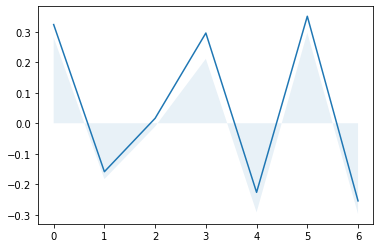

In [4]:
def mean_and_deviation(y):
    figure, axe = plt.subplots()
    x = range(y.shape[1])
    axe.plot(x, y.mean(axis=0))
    axe.fill_between(x, y.mean(axis=0) - y.std(axis=0), alpha=0.1)
    return figure
  
mean_and_deviation(data_1);

In [5]:
plt.hist(data_1.T, bins=10);

Error in callback <function flush_figures at 0x7f69c075c3b0> (for post_execute):


KeyboardInterrupt: ignored

### 1. Can you generate 10k rows of new data from the same distribution?
Following considered data as (n_samples, n_features) shape like most library does.

Depend on the purpose but this has been a long topic to counter imbalanced data annotation during the training phase. Nowadays, such ideas are not used only to counter imbalanced data issues, but also in classification topics when the number of data is insufficient.

I will distinguish two main categories :
*   Generation based on linear functions, basically consist in generating new sample by interpolation of existing data points (1990-2010)
*   Generation based on deep learning, with generative models (last decade)

In [7]:
nb_samples = 1000; # 1000 for test

#### LINEAR
##### Simple Interpolation


In [8]:
from random import random, randint

def generate_simple_interp(inputs, number):
  def interpolate(a, b, coeff):
    return a+(a-b)*coeff
  return np.array([interpolate(inputs[randint(0, len(inputs)-1)], inputs[randint(0, len(inputs)-1)], random()) for value in range(number)])

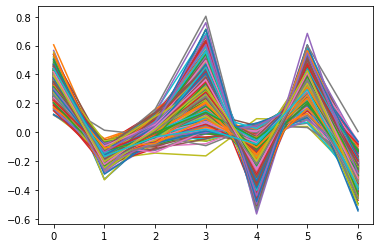

In [9]:
plt.plot(generate_simple_interp(data_1, nb_samples).T);

#### DEEP LEARNING


##### SIMPLE AE
From the following repository : https://github.com/lbun/VAE_Variational_Autoencoders/blob/master/VAE_Variational_Autoencoders_Part1.ipynb

In [19]:
from keras import callbacks, optimizers, models,layers

def get_simple_ae():
    embedding_dim = 1 

    #Input layer
    ae_input = layers.Input(shape=(data_1.shape[1],))  
    encoded = layers.Dense(embedding_dim, activation='relu')(ae_input)
    decoded = layers.Dense(data_1.shape[1],activation='sigmoid')(encoded) 

    #Autoencoder --> in this API Model, we define the Input tensor and the output layer
    #wraps the 2 layers of Encoder e Decoder
    autoencoder = models.Model(ae_input,decoded)

    #Encoder
    encoder = models.Model(ae_input,encoded)

    #Decoder
    encoded_input = layers.Input(shape=(embedding_dim,))
    decoder_layers = autoencoder.layers[-1]  #applying the last layer
    decoder = models.Model(encoded_input,decoder_layers(encoded_input))

    autoencoder.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    return autoencoder


In [20]:
def generate_simple_ae(inputs, number):
  autoencoder = get_simple_ae()
  history = autoencoder.fit(data_1, data_1, epochs=100, batch_size=256, 
                          shuffle=True, validation_split=0.1, 
                          callbacks=[ callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")])
  return decoder.predict(np.random.rand(number, 1))

In [21]:
plt.plot(generate_simple_ae(data_1, nb_samples).T);

Epoch 1/100
6/6 [==============================] - 1s 48ms/step - loss: 0.6977 - val_loss: 0.6948
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6939 - val_loss: 0.6912
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6903 - val_loss: 0.6877
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6869 - val_loss: 0.6844
Epoch 5/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6837 - val_loss: 0.6813
Epoch 6/100
6/6 [==============================] - 0s 15ms/step - loss: 0.6806 - val_loss: 0.6783
Epoch 7/100
6/6 [==============================] - 0s 14ms/step - loss: 0.6776 - val_loss: 0.6754
Epoch 8/100
6/6 [==============================] - 0s 13ms/step - loss: 0.6748 - val_loss: 0.6726
Epoch 9/100
6/6 [==============================] - 0s 14ms/step - loss: 0.6720 - val_loss: 0.6699
Epoch 10/100
6/6 [==============================] - 0s 13ms/step - loss: 0.6693 - val_loss: 0.6672
Epoch 11/100
6/6 [=

NameError: ignored

##### SIMPLE VAE
For this, I will based the implementation on Keras, as compared to GAN, VAE are sequential approach.
From the repository of françois chollet from keras : https://github.com/keras-team/keras-io/blob/master/examples/generative/vae.py

In [ ]:
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

def get_simple_vae():  
    # #Input layer
    # vae_input = layers.Input(shape=(data_1.shape[1],))  
    # encoded = layers.Dense(latent_dim, activation='relu')(vae_input)
    # decoded = layers.Dense(data_1.shape[1],activation='sigmoid')(encoded) 


    # # #Input layer
    # # vae_input = layers.Input(shape=(data_1.shape[1],))  
    # # # z_mean = layers.Dense(latent_dim, name="z_mean")(vae_input)
    # # # z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
    # # # z = Sampling()([z_mean, z_log_var])
    
    # # encoded = layers.Dense(latent_dim, activation='relu')(vae_input)
    # # # z = layers.Dense(latent_dim, name="z")(vae_input)
    # # decoded = layers.Dense(data_1.shape[1], activation='sigmoid')(encoded) 

    # #Autoencoder --> in this API Model, we define the Input tensor and the output layer
    # #wraps the 2 layers of Encoder e Decoder
    # var_autoencoder = models.Model(vae_input, decoded)

    # #Encoder
    # encoder = models.Model(input_img, z, name="encoder") #[z_mean, z_log_var, z]

    # #Decoder
    # encoded_input = layers.Input(shape=(embedding_dim,))
    # decoder_layers = var_autoencoder.layers[-1]  #applying the last layer
    # decoder = models.Model(encoded_input,decoder_layers(encoded_input))

    latent_dim = 1 

    #Input layer
    vae_input = layers.Input(shape=(data_1.shape[1],))  
    z_mean = layers.Dense(latent_dim, name="z_mean")(vae_input)
    z_log = layers.Dense(latent_dim, name="z_log")(x)
    z = Sampling(latent_dim*2)([z_mean, z_log])
    # encoded = layers.Dense(embedding_dim, activation='relu')(vae_input)
    decoded = layers.Dense(data_1.shape[1], activation='sigmoid')(z) 

    #Autoencoder --> in this API Model, we define the Input tensor and the output layer
    #wraps the 2 layers of Encoder e Decoder
    vautoencoder = models.Model(vae_input,decoded)

    #Encoder
    encoder = models.Model(vae_input,encoded)

    #Decoder
    encoded_input = layers.Input(shape=(embedding_dim,))
    decoder_layers = autoencoder.layers[-1]  #applying the last layer
    decoder = models.Model(encoded_input,decoder_layers(encoded_input))

    vautoencoder.compile(optimizer=keras.optimizers.Adam(), loss='binary_crossentropy')
    return vautoencoder

In [ ]:
def generate_simple_vae(inputs, number):
  model = get_simple_vae()
  model.summary()
  history = model.fit(data_1, data_1, epochs=100, batch_size=256, 
                      shuffle=True, validation_split=0.1, 
                      callbacks=[ keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")])
  return decoder.predict(np.random.rand(number, 1))

In [ ]:
plt.plot(generate_simple_vae(data_1, nb_samples).T);

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



latent_dim = 1
"""
## Build the encoder
"""
encoder_inputs = keras.Input(shape=(7, 1))
x = layers.Conv1D(4, activation="relu")(encoder_inputs)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

"""
## Build the decoder
"""

latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Conv1DTranspose(64, 3, activation="relu")(x)
decoder_outputs = layers.Conv1DTranspose(1, 3)(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

"""
## Define the VAE as a `Model` with a custom `train_step`
"""
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


"""
## Train the VAE
"""
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(data, epochs=30)

## GAN

In [ ]:
data.shape


### 2. How could prior-knowledge help you in this task?

In [ ]:
import requests
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np

# Read the Gist
res = requests.get("https://gist.githubusercontent.com/IdrissMg/695f423af0f0aaffd8d69bc403932c6b/raw/6f3192bbcc328f2aa53ae2faef0cefb825564ea9/data_science_test.json")
data = np.array(res.json())

In [ ]:
# The data-set is properly loaded
print(data[:10,:])